In [ ]:
#What is the most optimal skill to learn for Data Analysts?

In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

C:\Users\rishd\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df.head(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [5]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US = df_DA_US.dropna(subset = ['salary_year_avg'])

df_DA_US_exploded = df_DA_US.explode('job_skills')

df_DA_US_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [20]:
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by = 'count', ascending = False)
df_DA_skills = df_DA_skills.rename(columns = {'count': 'skill_count', 'median':'median_salary'})
df_DA_skills = df_DA_skills.reset_index()


DA_job_count = 0
for count in df_DA_skills['skill_count']:
    DA_job_count = DA_job_count + count

DA_job_count_len = len(df_DA_US)

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count_len * 100

df_DA_skills = df_DA_skills[df_DA_skills['skill_count'] > 0]

df_DA_skills

,job_skills,skill_count,median_salary,skill_percent
0,sql,2508,91000.0,57.655172
1,excel,1808,84392.0,41.563218
2,python,1431,97500.0,32.896552
3,tableau,1364,92875.0,31.356322
4,sas,926,90000.0,21.287356
...,...,...,...,...
165,couchbase,1,160515.0,0.022989
166,chainer,1,100000.0,0.022989
167,chef,1,85000.0,0.022989
168,cordova,1,113269.5,0.022989


In [21]:
skill_limit = 5

df_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_limit]
df_high_demand

,job_skills,skill_count,median_salary,skill_percent
0,sql,2508,91000.00,57.655172
1,excel,1808,84392.00,41.563218
2,python,1431,97500.00,32.896552
3,tableau,1364,92875.00,31.356322
4,sas,926,90000.00,21.287356
5,r,893,92500.00,20.528736
6,power bi,838,90000.00,19.264368
7,powerpoint,462,85000.00,10.620690
8,word,461,81194.75,10.597701
9,sql server,286,92500.00,6.574713


C:\Users\rishd\AppData\Local\Temp\ipykernel_13076\1548429711.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20', len(unique_skills))


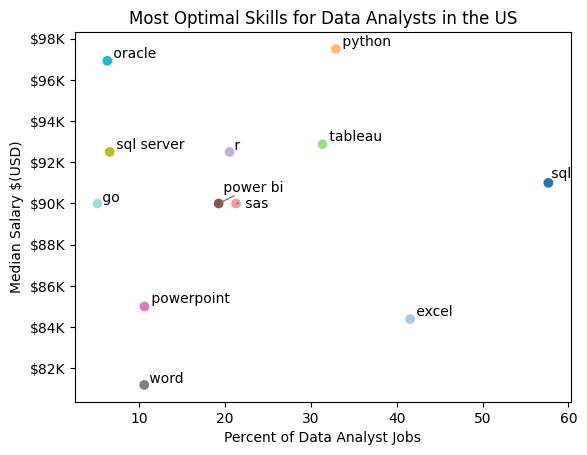

In [43]:
import matplotlib.cm as cm
import numpy as np

skills = df_high_demand['job_skills']
unique_skills = skills.unique()

cmap = cm.get_cmap('tab20', len(unique_skills))
skill_to_color = {skill: cmap(i) for i, skill in enumerate(unique_skills)}

point_colors = skills.map(skill_to_color)

plt.scatter(df_high_demand['skill_percent'], df_high_demand['median_salary'], color = point_colors)
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary $(USD)')
plt.title('Most Optimal Skills for Data Analysts in the US')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

from adjustText import adjust_text

texts = []
for i, txt in enumerate(df_high_demand['job_skills']):
    texts.append(plt.text(df_high_demand['skill_percent'].iloc[i], df_high_demand['median_salary'].iloc[i], " " + txt))

adjust_text(texts, arrowprops = dict(arrowstyle = '->', color = 'gray'))
plt.show()